In [26]:
from datascience import *
%matplotlib inline
path_data = '../../../assets/data/'
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=np.VisibleDeprecationWarning)

# Lecture 21

## Discussion Question: Super Soda

In [27]:
def simulate_one_count(sample_size):
    return np.count_nonzero(np.random.choice(['H', 'T'], sample_size) == 'H')
simulate_one_count(200)

106

In [28]:
num_simulations = 10000
counts = make_array()
for i in np.arange(num_simulations):
    counts = np.append(counts, simulate_one_count(200))

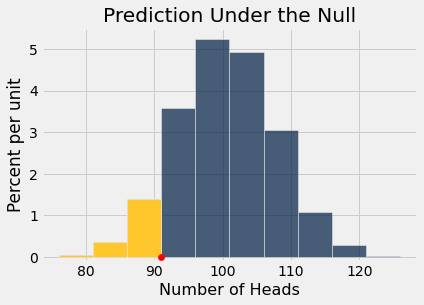

In [29]:
trials = Table().with_column('Number of Heads', counts)
trials.hist(right_end=91)
plots.ylim(-0.001, 0.055)
plots.scatter(91, 0, color='red', s=40, zorder=3)
plots.title('Prediction Under the Null');

In [30]:
np.count_nonzero(counts <= 91)/len(counts)

0.1179

Conclusion: 

We fail to reject the null hypothesis.

## Changing the number of simulations

In [31]:
# Keeping the data fixed, we can re-run the test with a new simulation under the null
def run_test(num_simulations, sample_size):
    counts = make_array()
    for i in np.arange(num_simulations):
        counts = np.append(counts, simulate_one_count(sample_size))
    return counts

counts = run_test(10000, 200)
np.count_nonzero(counts <= 91)/len(counts)

0.1153

In [32]:
# Let's repeat that 50 times for each number of simulations
tests = Table(['simulations', 'p-value for 91'])
for num_sims in [100, 1000, 10000]:
    for k in np.arange(50):
        counts = run_test(num_sims, 200)
        tests = tests.with_row([
            num_sims, 
            np.count_nonzero(counts <= 91)/len(counts),
        ])
tests.show(3)

simulations,p-value for 91
100,0.12
100,0.08
100,0.08


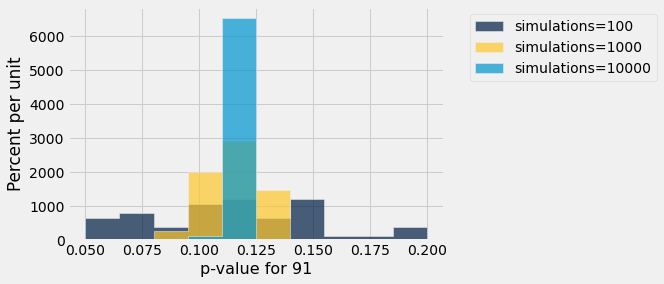

In [33]:
# For larger numbers of simulations, p-values are more consistent
tests.hist(1, group='simulations')

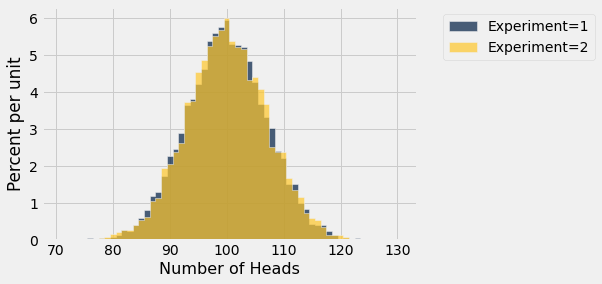

In [34]:
# Since a large number of simulations provides a good estimate of the
# theoretical distribution of the test statistic under the null hypothesis
num_sims = 10000
counts_1 = run_test(num_sims, 200)
counts_2 = run_test(num_sims, 200)
t = Table().with_columns(
    'Experiment', [1] * num_sims + [2] * num_sims,
    'Number of Heads', np.append(counts_1, counts_2))
t.hist(1, group='Experiment', bins=np.arange(70.5, 131, 1))

## Changing the size of the taste test

In [35]:
# Suppose that the true proportion of people who prefer Super Soda is 45%
true_proportion = 0.45
true_distribution = make_array(true_proportion, 1 - true_proportion)
true_distribution

array([ 0.45,  0.55])

In [36]:
# Taste tests with 200 people will give varioius numbers of people who prefer Super Soda
sample_size = 200
sample_proportions(sample_size, true_distribution) * sample_size

array([  97.,  103.])

In [37]:
# If you run a taste test for 200 people, what might you conclude?
def run_experiment(num_simulations, sample_size, true_proportion):
    # Collect data
    true_distribution = make_array(true_proportion, 1 - true_proportion)
    taste_test_results = sample_proportions(sample_size, true_distribution) * sample_size
    observed_stat_from_this_sample = taste_test_results.item(0)
    
    # Conduct hypothesis test
    counts = run_test(num_simulations, sample_size)
    p_value = np.count_nonzero(counts <= observed_stat_from_this_sample) / len(counts)
    return p_value

run_experiment(10000, 200, 0.45)

0.0195

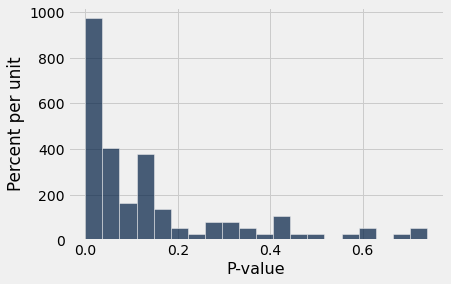

In [38]:
# Let's imagine running our taste test over and over again to see how often we reject the null
true_proportion = 0.45
sample_size = 200
p_values = make_array()
for k in np.arange(100):
    p_value = run_experiment(1000, sample_size, true_proportion)
    p_values = np.append(p_values, p_value)
Table().with_column('P-value', p_values).hist(0, bins=20)

In [41]:
sum(p_values >= 0.5)/len(p_values)

0.059999999999999998

## Discussion Question: Roulette

In [42]:
wheel = make_array(18/38, 18/38, 2/38)

In [43]:
obs_counts = make_array(166, 186, 28)
obs_distribution = obs_counts / 380
obs_tvd = sum(abs(obs_distribution - wheel))/2
obs_tvd

0.036842105263157891

In [44]:
def simulate_one_tvd():
    sample_dist = sample_proportions(380, wheel)
    return sum(abs(sample_dist - wheel))/2

In [45]:
num_simulations = 10000
tvds = make_array()
for i in np.arange(10000):
    tvds = np.append(tvds, simulate_one_tvd())

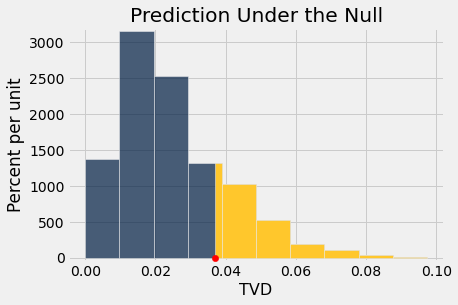

In [46]:
Table().with_column('TVD', tvds).hist(left_end=obs_tvd)
plots.ylim(-0.5, 32)
plots.scatter(obs_tvd, 0, color='red', s=40, zorder=3)
plots.title('Prediction Under the Null');

In [47]:
np.count_nonzero(tvds >= obs_tvd)/num_simulations

0.2109

Conclusion: 

We fail to reject the null hypothesis.